# Comparando datos con una PDF

In [1]:
%matplotlib notebook

In [2]:
pip install boost-histogram

Note: you may need to restart the kernel to use updated packages.


In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import boost_histogram as bh

Generador de números aleatorios

In [4]:
rng = np.random.default_rng()

Número de eventos en el histograma

In [5]:
numero_eventos = 1000

In [6]:
x = rng.normal(size=numero_eventos)
x

array([ 6.90815482e-01, -1.74138691e-01, -2.71393995e-01,  2.86366231e-02,
        6.84308165e-01, -9.99406751e-01, -1.58404729e+00, -5.87611819e-01,
       -4.79038025e-02, -6.56767422e-02,  9.84208488e-01, -1.42195556e+00,
       -1.15841648e+00,  1.52682348e-01,  2.66894027e-01, -7.33470367e-02,
       -4.87063244e-02,  6.95445559e-01, -6.69046186e-01,  1.20439776e+00,
        2.14311860e-01,  9.89843585e-01, -2.14086534e+00, -3.95740829e-01,
       -1.04350385e-01,  1.37105359e-01,  3.60277687e-01, -5.15657072e-01,
        6.52909472e-01,  1.86257446e-01, -6.94136494e-01, -5.54678605e-01,
        1.90136188e+00,  1.43414363e-01,  1.96625324e+00, -6.09675376e-01,
       -2.09831092e-01, -1.15171766e+00, -1.93570076e+00, -5.99697041e-01,
        1.61005512e+00, -2.93428908e-01, -4.25055657e-01, -5.71421689e-01,
       -1.29856352e+00, -1.06227030e+00, -3.08373748e+00, -6.47652823e-01,
       -4.95430811e-01, -4.48257896e-02,  6.93257857e-01,  1.62480195e+00,
        6.92473388e-01, -

Histograma de frecuencia

In [7]:
xmin, xmax = -5, 5
nbins = 20
hist = bh.Histogram(bh.axis.Regular(bins=nbins, start=xmin, stop=xmax))

In [8]:
hist.fill(x)

Histogram(Regular(20, -5, 5), storage=Double()) # Sum: 1000.0

<IPython.core.display.Javascript object>


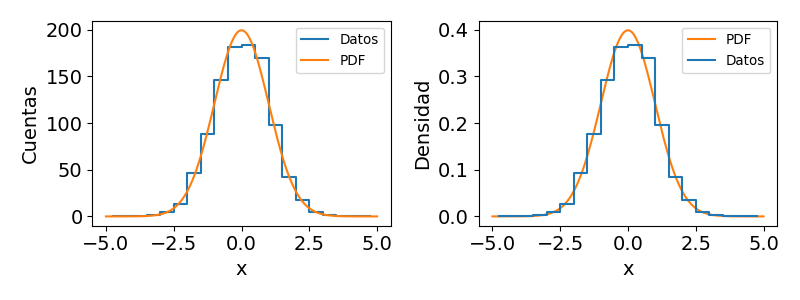

Text(0, 0.5, 'Densidad')

In [9]:
fig = plt.figure(figsize=(8,3))
ax1, ax2 = fig.subplots(1,2)
ax1.set_xlabel('x')
ax1.set_ylabel('Cuentas')
ax2.set_xlabel('x')
ax2.set_ylabel('Densidad')

Histograma de frecuencias

In [10]:
xbin = hist.axes.centers[0]
ax1.plot(xbin, hist.values(), drawstyle='steps-mid', color='tab:blue', label='Datos')

Función de densidad de probabilidad

In [11]:
x = np.linspace(xmin, xmax, 256)
ax2.plot(x, norm.pdf(x), color='tab:orange', label='PDF')

Factor de escala

In [12]:
bin_width = hist.axes[0].widths[0]
factor_escala = numero_eventos * bin_width
print("Factor de escala: ", factor_escala)

Factor de escala:  500.0


PDF escaleada

In [13]:
ax1.plot(x, norm.pdf(x)*factor_escala, color='tab:orange', label='PDF')

Datos escaleados

In [14]:
ax2.plot(xbin, hist.values()/factor_escala, drawstyle='steps-mid', color='tab:blue', label='Datos')

In [15]:
ax1.legend()
ax2.legend()

In [16]:
plt.savefig('histo_densidad.svg')